# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [56]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [44]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [45]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
102,2698,1/1/1963,55 Days at Peking,"$17,000,000","$10,000,000","$10,000,000"
2313,2621,10/15/2004,Being Julia,"$18,000,000","$14,488,705","$7,739,049"
1805,5127,4/26/2002,Dogtown and Z-Boys,"$400,000","$1,600,566","$1,293,295"
2969,4554,9/2/2007,Das Leben der Anderen,"$2,000,000","$81,197,047","$11,284,657"
383,1882,5/23/1984,Indiana Jones and the Temple of Doom,"$28,000,000","$333,080,271","$179,880,271"


In [46]:
# 1. Rows and columns
data.shape

(5391, 6)

In [47]:
# 2. Are there any null values present? - No
data.isnull().value_counts()

Rank   Release_Date  Movie_Title  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
False  False         False        False                  False                False                 5391
dtype: int64

In [48]:
# 3. Are there any duplicate rows? - No
data.duplicated().value_counts()

False    5391
dtype: int64

In [49]:
# 4. What are the data types of the columns?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [50]:
# We can use a for loop as doing same conversion 3 times
cols_to_convert = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
# For loop removes commas and '$' signs and converts to numeric data type.
for column in cols_to_convert:
    data[column] = pd.to_numeric(data[column].str.replace(",","").str.replace("$",""))

/var/folders/1f/1w554m957mz1kkr7yftsx8qr0000gn/T/ipykernel_83540/3289150856.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = pd.to_numeric(data[column].str.replace(",","").str.replace("$",""))


In [51]:
# Check our loop worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [52]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [53]:
# Check it worked
data['Release_Date']

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [54]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [60]:
# 1. What is the average production budget of the films in the data set?
'{:,.2f}'.format(round(data['USD_Production_Budget'].mean(), 2))

'31,113,737.58'

In [61]:
# 2. What is the average worldwide gross revenue of films?
'{:,.2f}'.format(round(data['USD_Worldwide_Gross'].mean(), 2))

'88,855,421.96'

In [63]:
# 3. What were the minimums for worldwide and domestic revenue?
'{:,.2f}'.format(round(data['USD_Worldwide_Gross'].min(), 2))

'0.00'

In [64]:
'{:,.2f}'.format(round(data['USD_Domestic_Gross'].min(), 2))

'0.00'

In [69]:
# 4. Are the bottom 25% of films actually profitable or do they lose money?
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [73]:
# 5. What are the highest production budget and highest worldwide gross revenue of any film?
data['USD_Production_Budget'].nlargest(1)

3529    425000000
Name: USD_Production_Budget, dtype: int64

In [75]:
data[data['USD_Production_Budget'] == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [76]:
data['USD_Worldwide_Gross'].nlargest(1)

3529    2783918982
Name: USD_Worldwide_Gross, dtype: int64

In [77]:
data[data['USD_Worldwide_Gross']==2783918982]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [78]:
# 6. How much revenue did the lowest and highest budget films make?
data['Profit'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']

In [92]:
# Lowest budget made
data[data['USD_Production_Budget']==1100]['Profit']

2427    179941
Name: Profit, dtype: int64

In [84]:
# Highest budget made
data[data['USD_Production_Budget']==425000000]['Profit']

3529    2358918982
Name: Profit, dtype: int64

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [93]:
# We can see all the films which grossed 0 domestically using below
# There are 512 instances (rows)
data[data['USD_Domestic_Gross']==0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
6,4630,1927-12-08,Wings,2000000,0,0,-2000000
8,4240,1930-01-01,Hell's Angels,4000000,0,0,-4000000
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0,-1200000
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0,-1250000
...,...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [94]:
# We can see all the films which grossed 0 internationally using below
# There are 357 instances (rows)
data[data['USD_Worldwide_Gross']==0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
6,4630,1927-12-08,Wings,2000000,0,0,-2000000
8,4240,1930-01-01,Hell's Angels,4000000,0,0,-4000000
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0,-1200000
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0,-1250000
...,...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000


### Filtering on Multiple Conditions
For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

In [99]:
# Here we use multiple conditions
data[(data['USD_Worldwide_Gross']!=0) & (data['USD_Domestic_Gross'] == 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [101]:
# Testing query method with a single condition
data.query('USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,5100000
...,...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010,321856949
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392


In [105]:
int_releases = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')

In [106]:
int_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [107]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [115]:
# Unreleased films - Solution using query
data.query("Release_Date >= @scrape_date")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [114]:
# Unreleased films - solution using pandas notation
data[data['Release_Date'] >= scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [127]:
# Use query() to keep rows where Release_Date is after than scrape_date
future_releases = data.query("Release_Date > @scrape_date")

# Use drop() to remove these rows
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [132]:
total_films = data_clean.shape[0]

In [133]:
unprofitable_films = data_clean.query('USD_Worldwide_Gross < USD_Production_Budget').shape[0]

In [136]:
print(f"Total unprofitable films is {round(unprofitable_films/total_films*100, 2)}%")

Total unprofitable films is 37.28%


# Seaborn for Data Viz: Bubble Charts

In [137]:
import seaborn as sns

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

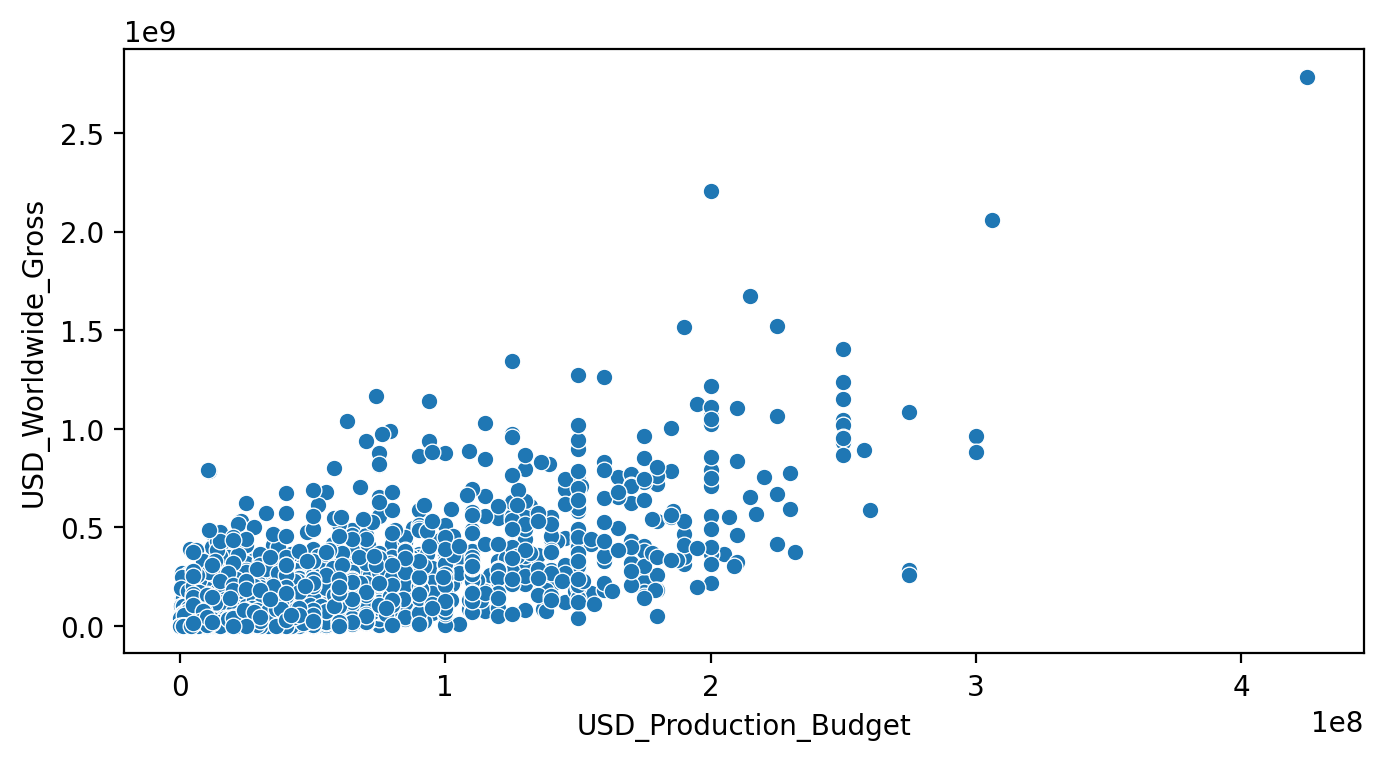

In [139]:
plt.figure(figsize=(8,4), dpi=200)

axes = sns.scatterplot(data = data_clean,
                x = 'USD_Production_Budget',
                y = 'USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')


[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

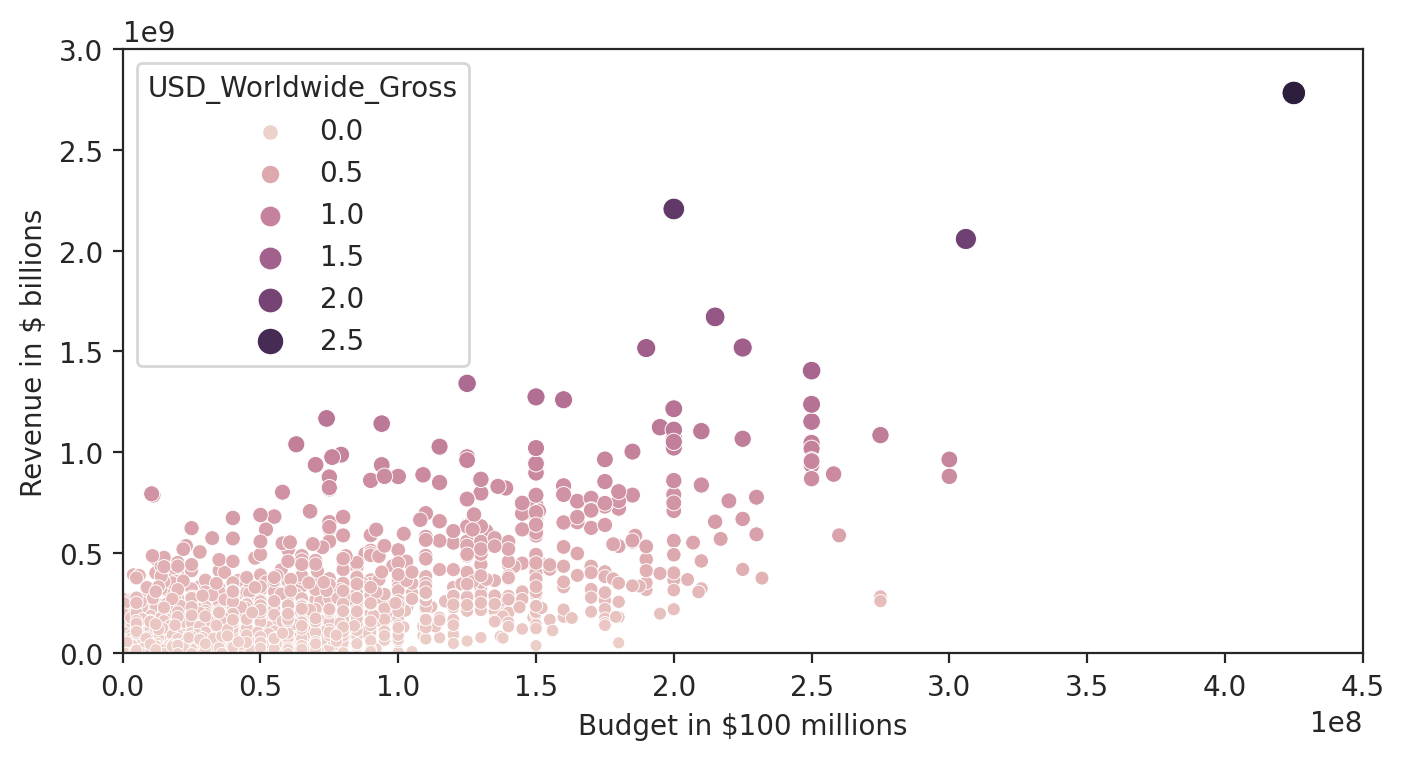

In [145]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('ticks'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



[Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Year'),
 (0.0, 450000000.0),
 (-19876.0, 17531.0)]

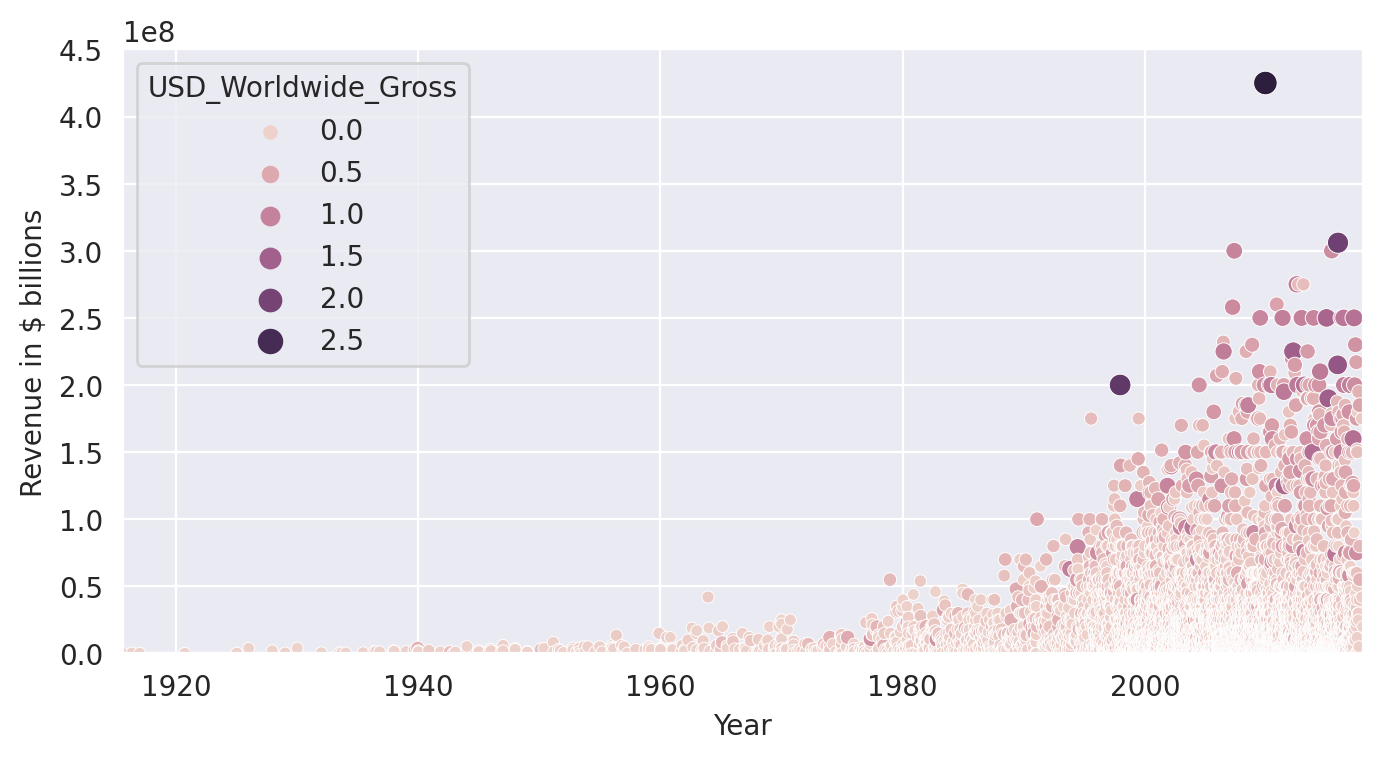

In [154]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

 
ax.set(ylabel='Revenue in $ billions',
       xlabel='Year',
       ylim=(0, 450000000),
       xlim=(data_clean['Release_Date'].min(), data_clean['Release_Date'].max()))
        
# ylim=(0, 3000000000),
# ,

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [163]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
dt_index.year

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [173]:
data_clean['Release_Date'].dt.year // 10 * 10

0       1910
1       1910
2       1910
3       1920
4       1920
        ... 
5379    2010
5380    2010
5381    2010
5382    2010
5383    2010
Name: Release_Date, Length: 5384, dtype: int64

In [174]:
data_clean['Decade'] = data_clean['Release_Date'].dt.year // 10 * 10

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [176]:
# old_films = 
data_clean[data_clean['Release_Date'] < '1970-01-01' ]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1920
...,...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,96308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,74000000,1960


In [177]:
old_films = data_clean[data_clean['Release_Date'] < '1970-01-01' ]
new_films = data_clean[data_clean['Release_Date'] >= '1970-01-01' ]

In [178]:
# How many films were released prior to 1970?
old_films.shape[0]

153

In [182]:
# Most expensive film made prior to 1970
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1960
...,...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,24800000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,7866000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,29886000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910


# Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the .regplot() function. 

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

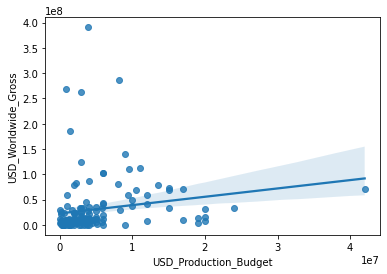

In [183]:
sns.regplot(data=old_films, 
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

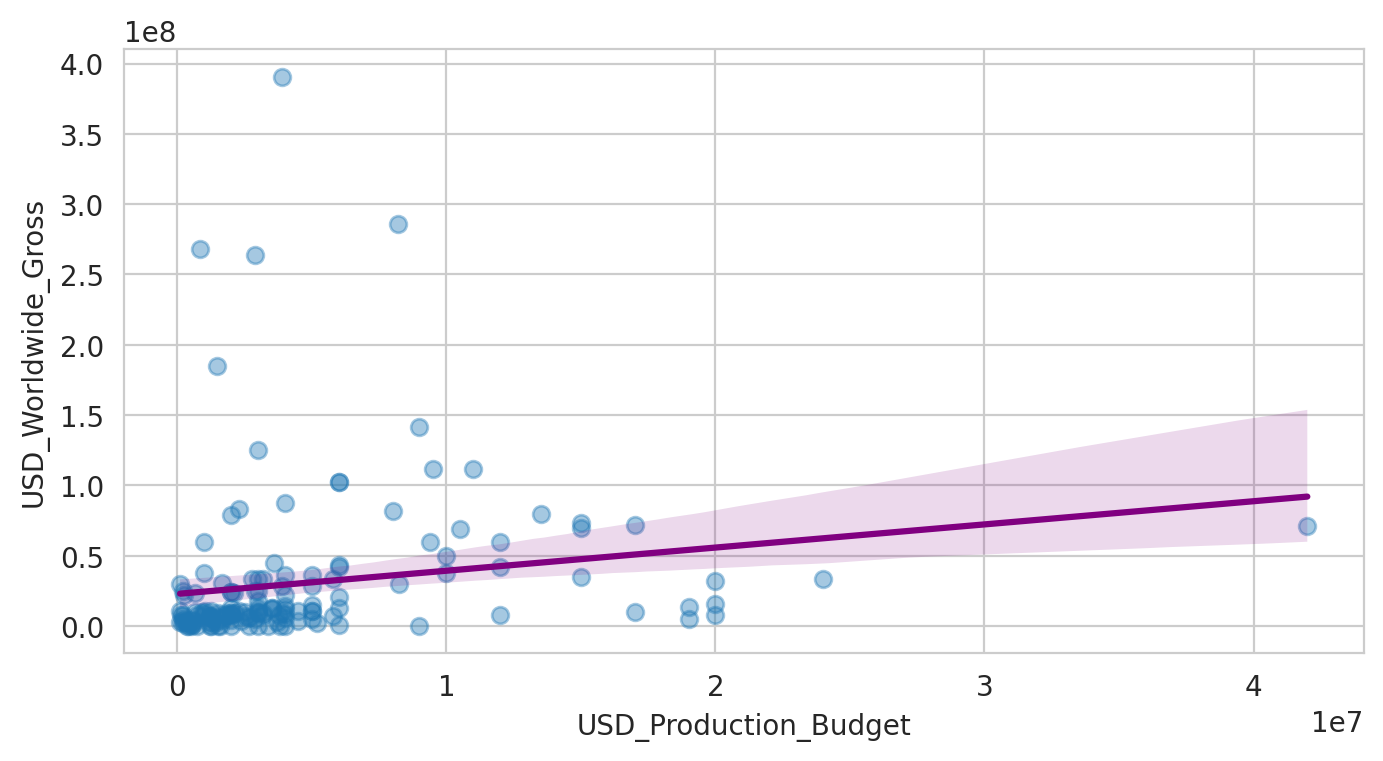

In [185]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                scatter_kws = {'alpha': 0.4},
                line_kws = {'color': 'purple'})

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [186]:
# Need this import statement
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [190]:
# Instantiate an object of Class Linear Regression
reg = LinearRegression()

# Data
x_old = old_films[['USD_Production_Budget']]
y_old = old_films[['USD_Worldwide_Gross']]

reg.fit(x_old, y_old)

LinearRegression()

In [201]:
# Intercept and slope are attirubtes of the LinearRegression object we instantiated
print(f"Intercept is: {reg.intercept_[0]}")
print(f"Slope is: {reg.coef_[0]}")

Intercept is: 22821538.635080386
Slope is: [1.64771314]


In [205]:
# R-squared
reg.score(x_old, y_old)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [193]:
answer = reg.predict([[350000000]])

In [198]:
'{:,.2f}'.format(float(answer[0]))

/var/folders/1f/1w554m957mz1kkr7yftsx8qr0000gn/T/ipykernel_83540/511709703.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  '{:,.2f}'.format(float(answer[0]))


'599,521,139.04'